# 色々なサウンドファイルをFFTしてグラフ表示するスクリプト

## Usage
filenameとformatをお好みの設定に直してお楽しみください．

## WAV素材サイト
https://www3.nd.edu/~dthain/courses/cse20211/fall2013/wavfile/

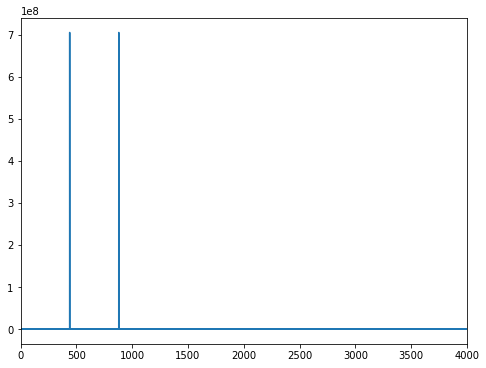

In [22]:
import scipy.fftpack
import numpy as np
import matplotlib.pyplot as plt
import pydub

# 入力ファイルの名前とフォーマット形式の設定
filename = 'sine2.wav'
format = 'wav'

# 出力するグラフのサイズ設定
plt.rcParams['figure.figsize'] = (8, 6)

# 出力するグラフのx軸の範囲設定
plt.xlim(0, 4000)

# ファイルの読み込み
data = pydub.AudioSegment.from_file(filename, format)
y = data.get_array_of_samples()
yf = scipy.fftpack.fft(y)
rate = float(pydub.utils.mediainfo(filename)['sample_rate'])
x = scipy.fftpack.fftfreq(len(y), 1 / rate)

# グラフの表示
plt.plot(x, np.abs(yf))
plt.show()